## Load the data



In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Redback_B/cardio_data_processed.csv')

In [ ]:
df.shape # examine the shape and determine its rank

(68205, 17)

In [ ]:
# Show data types and number of null values for each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [ ]:
df = df.drop(["id", "age", "bp_category"], axis=1)
# drop less meaningful variables

<ipython-input-9-fcedffe1a5a6>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


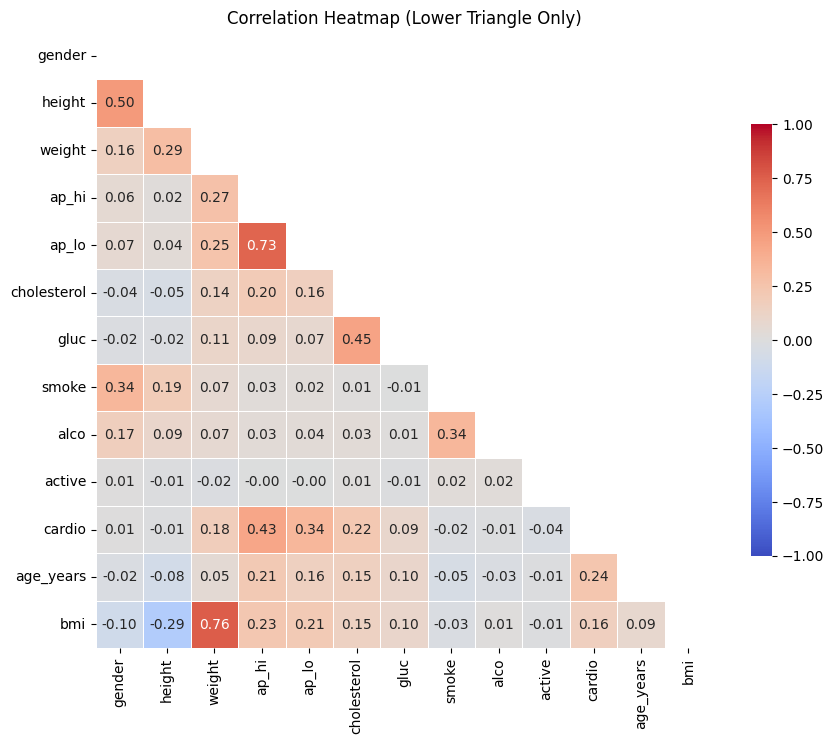

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", mask=mask,
            cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.7})

plt.title('Correlation Heatmap (Lower Triangle Only)')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# separate features and labels
x = df.drop('cardio', axis=1)
y = df['cardio']

# split the data into training, validation, and test sets
x_train, x_val_test, y_train, y_val_test = train_test_split(x, y, test_size=0.4, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=42)

# Now I will use x_train, x_test, x_val and y_train, y_test, y_val

In [ ]:
# Convert categorical columns using one-hot encoding
categorical_columns = ['bp_category_encoded']
X_train = pd.get_dummies(x_train, columns=categorical_columns)
X_test = pd.get_dummies(x_test, columns=categorical_columns)
X_val = pd.get_dummies(x_val, columns=categorical_columns)

# Normalize numerical columns
numeric_columns = ['height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])
X_val[numeric_columns] = scaler.transform(X_val[numeric_columns])

In [ ]:
X_val.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,bp_category_encoded_Elevated,bp_category_encoded_Hypertension Stage 1,bp_category_encoded_Hypertension Stage 2,bp_category_encoded_Normal
23361,2,1.926064,-0.288504,-0.407940,-0.140589,1,1,1,0,0,1.349353,-1.012807,0,1,0,0
46102,1,-0.900742,-1.406501,-0.407940,-0.140589,1,1,0,0,1,1.497021,-0.961062,0,1,0,0
32906,1,0.451209,-0.358379,-0.407940,-0.140589,2,2,0,0,1,-0.570336,-0.526831,0,1,0,0
39424,1,0.451209,-0.288504,-0.407940,-0.140589,1,1,0,0,1,-1.751683,-0.466252,0,1,0,0
40737,2,-0.286219,0.060870,0.216254,-0.140589,2,1,1,0,1,0.315674,0.179422,0,1,0,0


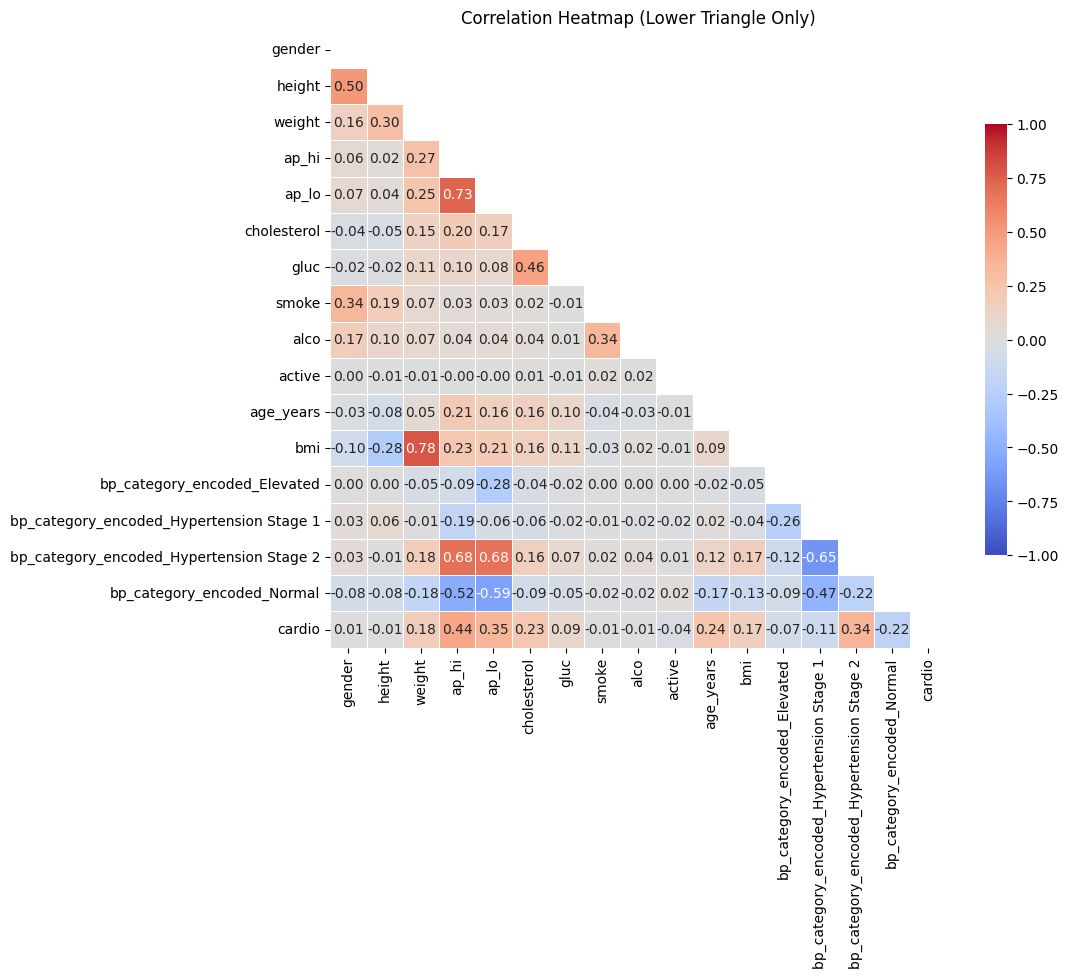

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
train_data_matrix = pd.concat([X_train, y_train], axis=1)
corr_matrix = train_data_matrix.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", mask=mask,
            cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.7})

plt.title('Correlation Heatmap (Lower Triangle Only)')
plt.show()

In [ ]:
print(f'Shape of my datasets are: {X_train.shape}, {X_test.shape} and {X_val.shape}.')

Shape of my datasets are: (40923, 16), (13641, 16) and (13641, 16).


### Setting up a model for training

Construct a deep feedforward neural network.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers, optimizers, utils

# Set Python random seed
np.random.seed(42)
# Set TensorFlow random seed
tf.random.set_seed(42)

# Set input_shape as (16,) based on the number of features in X_train
input_shape = (16,)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_val)

# Feedforward Neural Network
fnn_model = MLPClassifier(hidden_layer_sizes=(100, 50))
# Multi-Layer Perceptron Classifier is a type of feedforward neural network for classification tasks
fnn_model.fit(X_train, y_train)
fnn_predictions = fnn_model.predict(X_val)

# Combine predictions
combined_predictions = np.column_stack((xgb_predictions, fnn_predictions))

# Train a Logistic Regression on combined predictions
meta_model = LogisticRegression()
meta_model.fit(combined_predictions, y_val)

# Make final predictions
xgb_test_predictions = xgb_model.predict(X_test)
fnn_test_predictions = fnn_model.predict(X_test)
combined_test_predictions = np.column_stack((xgb_test_predictions, fnn_test_predictions))
final_predictions = meta_model.predict(combined_test_predictions)

# Evaluate the final model
accuracy = accuracy_score(y_test, final_predictions)
print(f"Final Ensemble Model Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Final Ensemble Model Accuracy: 0.7319111502089289


In [ ]:
combined_predictions

array([[0, 0],
       [0, 0]])